In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

2024-05-13 10:59:56.007473: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('selected_data.csv')
df.loc[:,"1991":"2021"] = df.loc[:,"1991":"2021"].interpolate('linear', axis =1, limit_direction='both')
df.head()

,Country Code,Category Name,Indicator Name,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Country Name
0,ALB,agriculture_rural_development,Rural population (% of total population),63.300,62.751,62.201,61.646,61.089,60.527,59.965,...,44.613,43.577,42.566,41.579,40.617,39.681,38.771,37.888,37.031,Albania
1,ARG,agriculture_rural_development,Rural population (% of total population),12.672,12.458,12.248,12.040,11.836,11.634,11.436,...,8.751,8.623,8.497,8.373,8.251,8.130,8.009,7.889,7.771,Argentina
2,ARM,agriculture_rural_development,Rural population (% of total population),32.850,33.122,33.394,33.668,33.943,34.219,34.496,...,36.836,36.888,36.915,36.918,36.897,36.851,36.781,36.687,36.569,Armenia
3,AUS,agriculture_rural_development,Rural population (% of total population),14.597,14.715,14.843,14.972,15.102,15.233,15.364,...,14.498,14.398,14.299,14.200,14.096,13.988,13.876,13.759,13.638,Australia
4,AUT,agriculture_rural_development,Rural population (% of total population),37.311,37.583,37.856,38.130,38.404,38.680,38.955,...,42.664,42.474,42.285,42.095,41.906,41.703,41.485,41.252,41.005,Austria


In [3]:
df[df['Country Code'] == "ARG"]

,Country Code,Category Name,Indicator Name,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Country Name
1,ARG,agriculture_rural_development,Rural population (% of total population),12.672000,12.458000,12.248000,12.040000,11.836000,11.634000,11.436000,...,8.751000,8.623000,8.497000,8.373000,8.251000,8.130000,8.009000,7.889000,7.771000,Argentina
98,ARG,agriculture_rural_development,Employment in agriculture (% of total employme...,13.669999,13.472255,13.261297,13.048347,12.935374,12.735167,12.478691,...,8.184550,8.061588,7.842719,7.694325,7.503205,7.413701,7.330880,7.285752,7.333608,Argentina
195,ARG,aid_effectiveness,Net migration,-8569.000000,-13201.000000,-16383.000000,-18725.000000,-19736.000000,-20396.000000,-20588.000000,...,5369.000000,5801.000000,5522.000000,5215.000000,4926.000000,4690.000000,4478.000000,2344.000000,2344.000000,Argentina
292,ARG,aid_effectiveness,"Vulnerable employment, total (% of total emplo...",24.469082,24.520399,24.528643,24.295856,24.138060,24.541631,23.657508,...,19.685784,20.177976,20.639547,20.880309,21.264002,21.617563,22.715002,24.066955,24.018984,Argentina
389,ARG,aid_effectiveness,"Mortality rate, under-5 (per 1,000 live births)",28.300000,27.600000,26.500000,25.400000,24.300000,23.200000,22.200000,...,12.700000,12.200000,11.600000,11.000000,10.300000,9.500000,8.600000,7.700000,6.900000,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11932,ARG,social_protection_labor,"Employment to population ratio, ages 15-24, to...",42.169000,40.999000,36.891000,35.107000,28.122000,29.787000,31.933000,...,32.242000,31.199000,30.860000,30.372000,30.059000,30.015000,28.930000,23.029000,28.359000,Argentina
12029,ARG,social_protection_labor,Employment in agriculture (% of total employme...,13.669999,13.472255,13.261297,13.048347,12.935374,12.735167,12.478691,...,8.184550,8.061588,7.842719,7.694325,7.503205,7.413701,7.330880,7.285752,7.333608,Argentina
12126,ARG,trade,Medium and high-tech exports (% manufactured e...,23.624434,23.624434,28.972184,30.006418,30.461397,31.789295,37.406161,...,49.676877,49.128677,46.127007,44.118493,45.423432,46.242756,42.696595,36.383624,42.338933,Argentina
12223,ARG,urban_developmen,Urban population (% of total population),87.328000,87.542000,87.752000,87.960000,88.164000,88.366000,88.564000,...,91.249000,91.377000,91.503000,91.627000,91.749000,91.870000,91.991000,92.111000,92.229000,Argentina


In [4]:
df[df['Country Code'] == "ARG"].loc[:,"1991":"2021"]

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,12.672000,12.458000,12.248000,12.040000,11.836000,11.634000,11.436000,11.241000,11.048000,10.858000,...,8.879000,8.751000,8.623000,8.497000,8.373000,8.251000,8.130000,8.009000,7.889000,7.771000
98,13.669999,13.472255,13.261297,13.048347,12.935374,12.735167,12.478691,12.227130,12.064594,11.894394,...,8.366417,8.184550,8.061588,7.842719,7.694325,7.503205,7.413701,7.330880,7.285752,7.333608
195,-8569.000000,-13201.000000,-16383.000000,-18725.000000,-19736.000000,-20396.000000,-20588.000000,-20331.000000,-20220.000000,-22770.000000,...,3127.000000,5369.000000,5801.000000,5522.000000,5215.000000,4926.000000,4690.000000,4478.000000,2344.000000,2344.000000
292,24.469082,24.520399,24.528643,24.295856,24.138060,24.541631,23.657508,23.288410,23.070110,22.828786,...,19.029967,19.685784,20.177976,20.639547,20.880309,21.264002,21.617563,22.715002,24.066955,24.018984
389,28.300000,27.600000,26.500000,25.400000,24.300000,23.200000,22.200000,21.300000,20.400000,19.700000,...,13.300000,12.700000,12.200000,11.600000,11.000000,10.300000,9.500000,8.600000,7.700000,6.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11932,42.169000,40.999000,36.891000,35.107000,28.122000,29.787000,31.933000,34.007000,32.760000,31.918000,...,33.077000,32.242000,31.199000,30.860000,30.372000,30.059000,30.015000,28.930000,23.029000,28.359000
12029,13.669999,13.472255,13.261297,13.048347,12.935374,12.735167,12.478691,12.227130,12.064594,11.894394,...,8.366417,8.184550,8.061588,7.842719,7.694325,7.503205,7.413701,7.330880,7.285752,7.333608
12126,23.624434,23.624434,28.972184,30.006418,30.461397,31.789295,37.406161,38.016192,33.077625,36.173551,...,46.721011,49.676877,49.128677,46.127007,44.118493,45.423432,46.242756,42.696595,36.383624,42.338933
12223,87.328000,87.542000,87.752000,87.960000,88.164000,88.366000,88.564000,88.759000,88.952000,89.142000,...,91.121000,91.249000,91.377000,91.503000,91.627000,91.749000,91.870000,91.991000,92.111000,92.229000


In [5]:
X = []
Y = []
for country_name in df['Country Name'].unique():
    Y.append(country_name)
    X.append(df[df['Country Name'] == country_name].loc[:,"1991":"2021"].to_numpy())
X = np.array(X)
X = np.expand_dims(X, axis = -1)

In [6]:
X.shape

(97, 128, 31, 1)

In [7]:
norm = tf.keras.layers.Normalization(axis=[1])
norm.adapt(X)
X = norm(X)

In [8]:
class VAE(tf.keras.Model):

  def __init__(self, input_size = (128, 31, 1)):
    super(VAE, self).__init__()
    self.input_size = input_size
    initializer = tf.random_normal_initializer(0., 0.001)
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=input_size),
            tf.keras.layers.Conv2D(filters=2, kernel_size=(1, 3), strides=(1, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=4, kernel_size=(1, 3), strides=(1, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=8, kernel_size=(1, 3), strides=(1, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=16, kernel_size=(1, 3), strides=(1, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation = 'relu'),
            tf.keras.layers.Dense(256),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape = (128, )),
            tf.keras.layers.Dense(256, activation = 'relu'),
            tf.keras.layers.Dense(1024, activation = 'relu'),
            tf.keras.layers.Reshape(target_shape=(128, 1, 8)),
            tf.keras.layers.Conv2DTranspose(filters=8, kernel_size=(1, 3), strides=(1, 2), padding='same', activation='relu'),
            tf.keras.layers.Conv2DTranspose(filters=4, kernel_size=(1, 3), strides=(1, 2), padding='same', activation='relu'),
            tf.keras.layers.Conv2DTranspose(filters=2, kernel_size=(1, 3), strides=(1, 2), padding='same', activation='relu'),
            tf.keras.layers.Conv2DTranspose(filters=2, kernel_size=(1, 3), strides=(1, 2), padding='same', activation='relu'),
            tf.keras.layers.Conv2DTranspose(filters=2, kernel_size=(1, 3), strides=(1, 2), padding='same', activation='relu'),
            tf.keras.layers.Cropping2D(cropping=((0, 0), (0, 1))),
            tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(1, 3), strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=False)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

In [9]:
optimizer = tf.keras.optimizers.Adam(1e-4)

def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  result = tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)
  return result


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  error = tf.keras.losses.MSE(y_true = x, y_pred = x_logit)
  logpx_z = -tf.reduce_sum(error, axis=[1, 2])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [10]:
epochs = 2000
model = VAE()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
model.encoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 15, 2)     │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 7, 4)      │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 3, 8)      │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 1, 16)     │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 590,876 (2.25 MB)

 Trainable params: 590,876 (2.25 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 128, 1, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 128, 2, 8)      │           200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 128, 4, 4)      │           100 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 128, 8, 2)      │            26 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 128, 16, 2)     │            14 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 128, 32, 2)     │            14 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping2d (Cropping2D)         │ (None, 128, 31, 2)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 128, 31, 1)     │             7 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 296,553 (1.13 MB)

 Trainable params: 296,553 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
for epoch in range(1, epochs + 1):
  for train_x in X:
    train_x = tf.expand_dims(train_x, axis=0)
    train_step(model, train_x, optimizer)
  loss = tf.keras.metrics.Mean()
  if epoch % 25 == 1:
      for test_x in X:
        test_x = tf.expand_dims(test_x, axis=0)
        loss(compute_loss(model, test_x))
      elbo = -loss.result()
      print('Epoch: {}, Test set ELBO: {}'
            .format(epoch, elbo))

Epoch: 1, Test set ELBO: -3967.58740234375
Epoch: 26, Test set ELBO: -3253.48193359375
Epoch: 51, Test set ELBO: -2441.61279296875
Epoch: 76, Test set ELBO: -2071.032958984375
Epoch: 101, Test set ELBO: -1754.21630859375
Epoch: 126, Test set ELBO: -1392.95703125
Epoch: 151, Test set ELBO: -1152.888671875
Epoch: 176, Test set ELBO: -1028.734130859375
Epoch: 201, Test set ELBO: -959.0562133789062
Epoch: 226, Test set ELBO: -912.588623046875
Epoch: 251, Test set ELBO: -863.4707641601562
Epoch: 276, Test set ELBO: -841.8065185546875
Epoch: 301, Test set ELBO: -831.7024536132812
Epoch: 326, Test set ELBO: -802.8591918945312
Epoch: 351, Test set ELBO: -776.0978393554688
Epoch: 376, Test set ELBO: -790.52587890625
Epoch: 401, Test set ELBO: -749.173828125
Epoch: 426, Test set ELBO: -731.213623046875
Epoch: 451, Test set ELBO: -712.7522583007812
Epoch: 476, Test set ELBO: -725.2041625976562
Epoch: 501, Test set ELBO: -701.5105590820312
Epoch: 526, Test set ELBO: -690.5631713867188
Epoch: 551, 

In [14]:
X_encoded, _ = model.encode(X)

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X_encoded)

KMeans(n_clusters=10, n_init=10, random_state=42)

/tmp/ipykernel_5863/2955061892.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


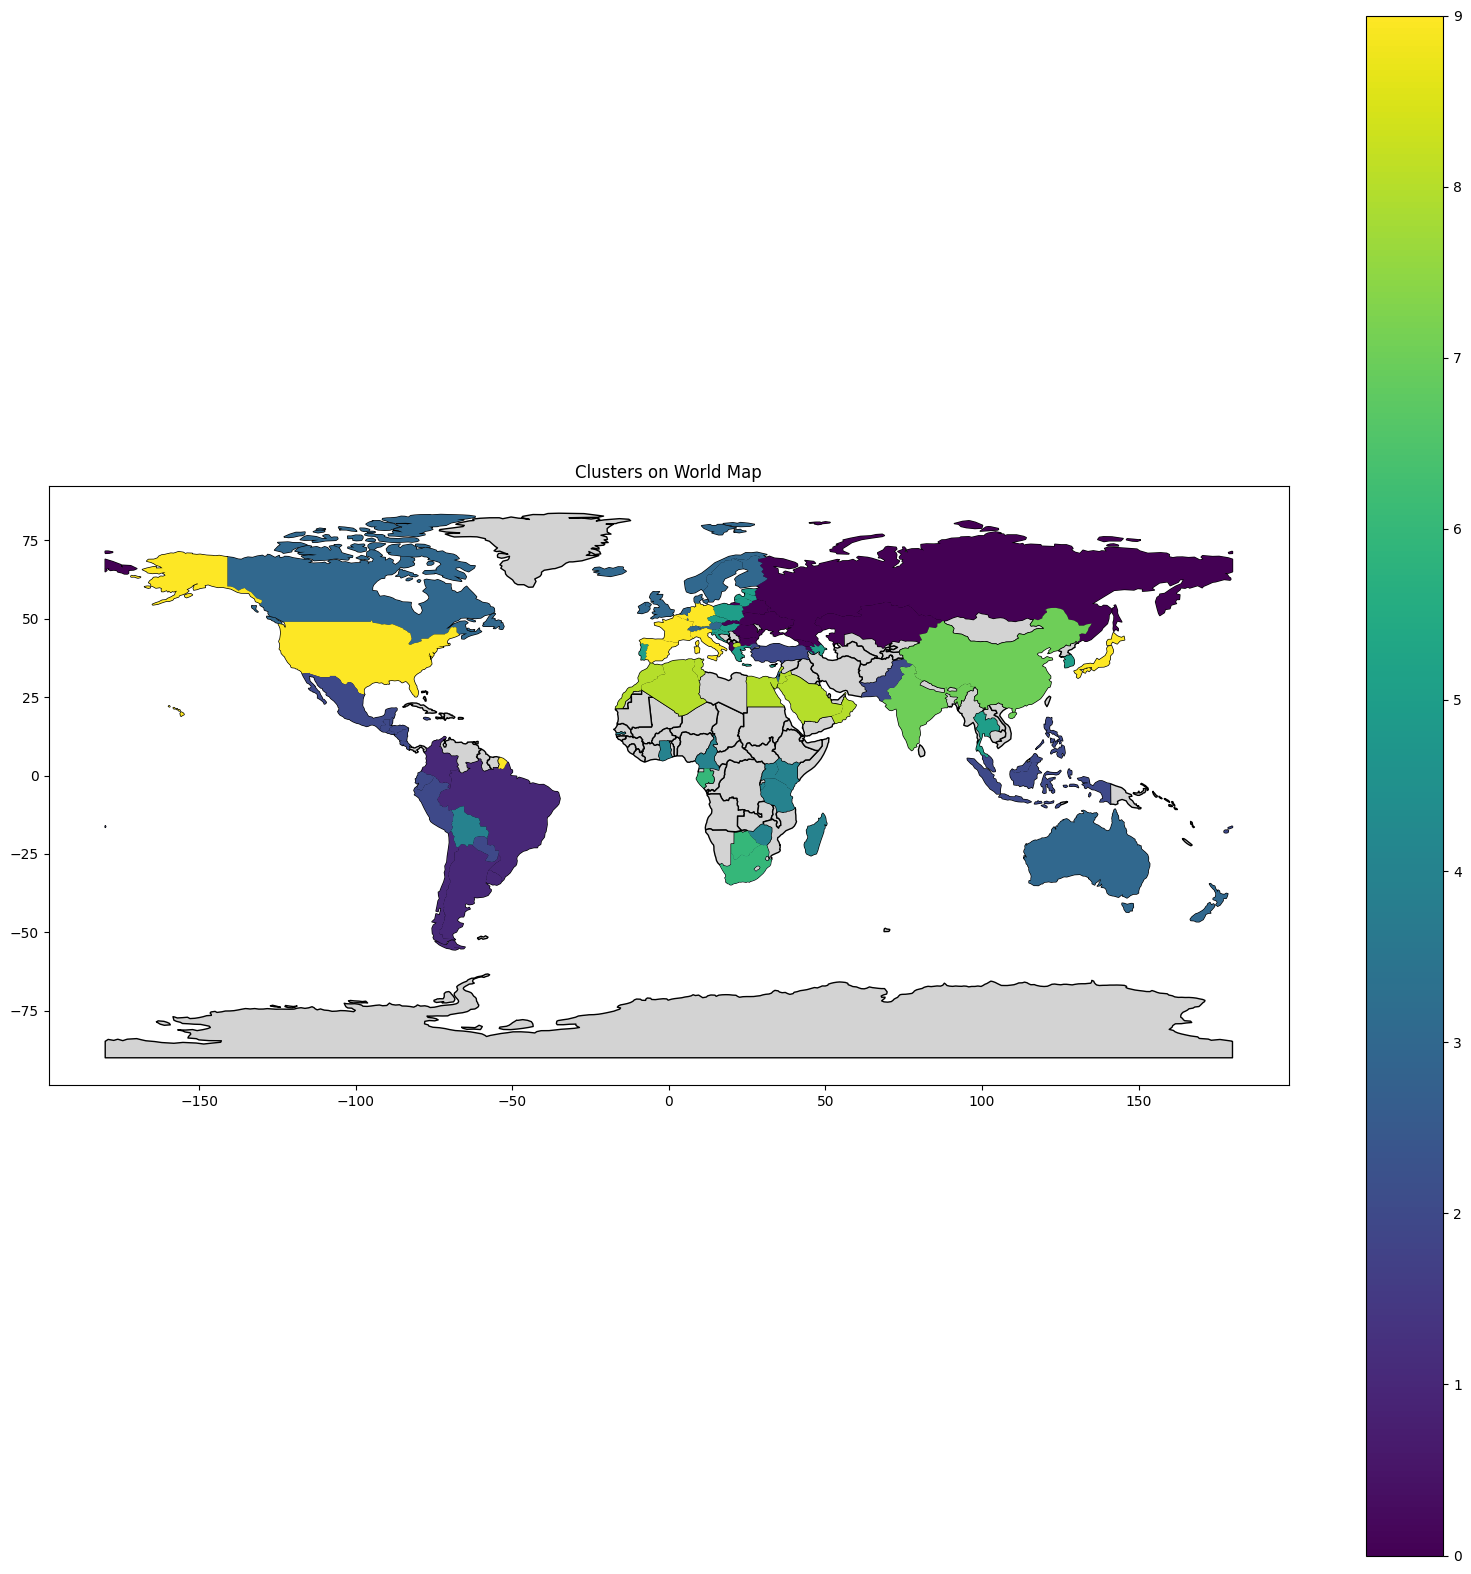

In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import utlis.map_plot as map_plot

result = pd.DataFrame({'Country Name': Y, 'Cluster': kmeans.labels_})

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

result['Country Name'] = map_plot.map_values_columns(result, 'Country Name')

world_clusters = world.merge(result, how='left', left_on='name', right_on='Country Name')

# Ustawienie rozmiaru mapy podczas wywoływania funkcji plot
fig, ax = plt.subplots(figsize=(20, 20))

# Wyświetlenie mapy świata
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Wstawianie kolorowych krajów na mapie dla każdego kraju
world_clusters.plot(column='Cluster', cmap='viridis', ax=ax, legend=True)

# Dodanie tytułu do mapy
ax.set_title('Clusters on World Map')

# Wyświetlenie mapy
plt.show()